In [107]:
import pandas as pd
#load dataset
df = pd.read_csv("heart_disease_prediction.csv")

In [108]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Data Cleaning

`df.isna()`: It returns a `new DataFrame` of the `same shape as df`, where each element is:
- True if the value is NaN (missing),
- False otherwise.

`.sum()`:
- When called on a DataFrame (df.isna()), .sum() calculates the sum along the specified axis.
- `axis=0` (default): Adds values column-wise (down each column).
- `axis=1`: Adds values row-wise (across each row).

In [109]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [110]:
print(df.dtypes)
df.dtypes.value_counts()

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object


int64      6
object     5
float64    1
Name: count, dtype: int64

We can see there are `5` categorical columns. However, two of the numerical features, `FastingBS` and `HeartDisease` are categorical as well. 

In [111]:
num_df = df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']]

# Find min and max for each column
min_values = num_df.min()
max_values = num_df.max()

# Combine results into a new DataFrame
min_max_df = pd.DataFrame({
    'Minimum': min_values,
    'Maximum': max_values
})

print("Min and Max Values for Each Column:")
print(min_max_df)


Min and Max Values for Each Column:
             Minimum  Maximum
Age             28.0     77.0
RestingBP        0.0    200.0
Cholesterol      0.0    603.0
MaxHR           60.0    202.0
Oldpeak         -2.6      6.2


In [112]:
print((df[['Cholesterol', 'RestingBP']] == 0).sum())

Cholesterol    172
RestingBP        1
dtype: int64


`df.loc[row_labels/boolean condition or mask, column_labels]`: If column_labels(Optional) are not provided, all columns are selected.
- eg., df.loc[:, ['Age', 'Gender']]  # All rows, columns 'Age' and 'Gender'
- df.loc[df['HeartDisease'] == 1]


In [113]:
df_clean = df.copy()

# only keep non-zero values for RestingBP
df_clean = df_clean[df_clean["RestingBP"] != 0]

heartdisease_mask = df_clean["HeartDisease"]==0

cholesterol_without_heartdisease = df_clean.loc[heartdisease_mask, "Cholesterol"]
cholesterol_with_heartdisease = df_clean.loc[~heartdisease_mask, "Cholesterol"]

df_clean.loc[heartdisease_mask, "Cholesterol"] = cholesterol_without_heartdisease.replace(to_replace = 0, value = cholesterol_without_heartdisease.median())
df_clean.loc[~heartdisease_mask, "Cholesterol"] = cholesterol_with_heartdisease.replace(to_replace = 0, value = cholesterol_with_heartdisease.median())

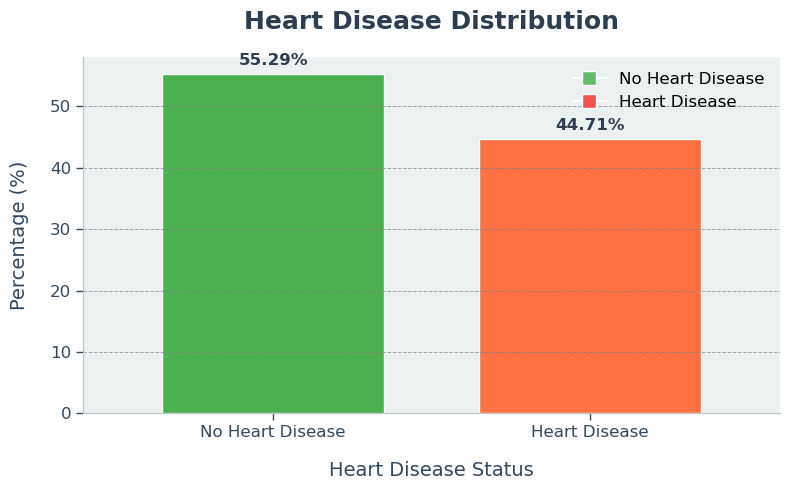

In [114]:
import pandas as pd
import matplotlib.pyplot as plt


# Extract the target variable column
target = df_clean['HeartDisease']

# Calculate the percentage distribution
percentages = target.value_counts(normalize=True) * 100

# Set a minimalist color palette
colors = ['#4CAF50', '#FF7043']  # Green for No Disease, Coral Red for Disease

# Plotting the class distribution with percentages
plt.figure(figsize=(8, 5))
ax = percentages.plot(kind='bar', color=colors, edgecolor='white', width=0.7)

# Title and labels with clean font style
plt.title('Heart Disease Distribution', fontsize=18, fontweight='bold', color='#2C3E50', pad=20)
plt.xlabel('Heart Disease Status', fontsize=14, color='#34495E', labelpad=15)
plt.ylabel('Percentage (%)', fontsize=14, color='#34495E', labelpad=15)

# Adjusting x-ticks and y-ticks
plt.xticks(ticks=[0, 1], labels=['No Heart Disease', 'Heart Disease'], rotation=0, fontsize=12, color='#34495E')
plt.yticks(fontsize=12, color='#34495E')

# Adding percentage values on top of the bars
for i, v in enumerate(percentages):
    ax.text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom', fontweight='bold', fontsize=12, color='#2C3E50')

# Adding gridlines and organizing the look
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7, color='gray')

# Adding a background color for the plot to enhance visual appeal
plt.gca().set_facecolor('#ECF0F1')

# Customizing tick marks and spines
ax.spines['top'].set_visible(False)  # Remove top border
ax.spines['right'].set_visible(False)  # Remove right border
ax.spines['left'].set_color('#BDC3C7')  # Light gray for the left border
ax.spines['bottom'].set_color('#BDC3C7')  # Light gray for the bottom border

# Customizing the tick marks for better visibility
ax.tick_params(axis='x', length=5, width=1, colors='#34495E')
ax.tick_params(axis='y', length=5, width=1, colors='#34495E')

# Adding legend to clarify colors
custom_legend = [
    plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='#66BB6A', markersize=10, label='No Heart Disease'),
    plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='#EF5350', markersize=10, label='Heart Disease')
]
plt.legend(handles=custom_legend, fontsize=12, frameon=False, loc='upper right')


# Tight layout for minimal space usage
plt.tight_layout()

# Show the plot
plt.show()


### Feature Engineering

To work with Categorical variables, we should break each categorical column into dummy columns with 1s and 0s.

The `pd.get_dummies()` function in pandas is used to convert categorical (non-numeric) columns into dummy variables (also known as one-hot encoding). pd.get_dummies() creates one column for each unique category in the original categorical variable. Each unique category in a column is transformed into a separate column, where each column will have:

- 1 if the row belongs to that category.
- 0 if the row does not belong to that category.

This is a way to represent categorical variables as binary (0 or 1) columns.

In [115]:
df_clean = pd.get_dummies(df_clean, drop_first=True)
df_clean.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True


### Feature Selection

Use correlation analysis or techniques like Recursive Feature Elimination (RFE) to remove irrelevant or redundant features.

<Axes: >

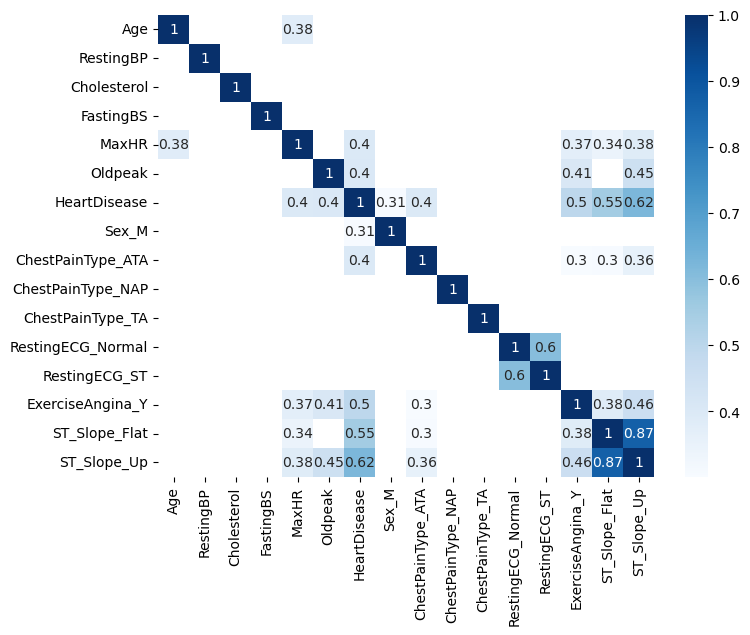

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
correlations = abs(df_clean.corr())
plt.figure(figsize=(8, 6))
#  sns.heatmap(correlations, annot=True, cmap="Blues")
sns.heatmap(correlations[correlations > 0.3], annot=True, cmap="Blues")

From our correlation heatmap, we can identify the following features to be positively correlated (correlation coefficient greater than 0.3) to `HeartDisease`:

- `Oldpeak`
- `MaxHR`
- `ChestPainType_ATA` 
- `ExerciseAngina_Y`
- `ST_Slope_Flat`
- `ST_Slope_Up`

### Modeling

In [117]:
from sklearn.model_selection import train_test_split
X = df_clean.drop(["HeartDisease"], axis=1)
y = df_clean["HeartDisease"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state = 417)

features = [
    "Oldpeak",
    "Sex_M",
    "MaxHR",
    "ChestPainType_ATA",
    "ExerciseAngina_Y",
    "ST_Slope_Flat",
    "ST_Slope_Up"
]

In [118]:
df_clean.columns


Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [119]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[features])
X_test_scaled = scaler.transform(X_test[features])

### Addressing Class Imbalance
If the dataset is imbalanced (e.g., more "No Heart Disease" than "Heart Disease"), resampling techniques can improve model performance:

In [120]:
# Handling class imbalance using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled_train, y_resampled_train = smote.fit_resample(X_train_scaled, y_train)

In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize and fit the RandomForest model
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_resampled_train, y_resampled_train)

# Predict on the test set
y_pred = rf_model.predict(X_test_scaled)

# Calculate and print the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

precision = precision_score(y_test, y_pred)
print("Precision: ", precision)

recall = recall_score(y_test, y_pred)
print("Recall: ", recall)

F1_score = f1_score(y_test, y_pred)
print("F1-Score: ", F1_score)

# Compute metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=['No Heart Disease', 'Heart Disease'])

# Extract confusion matrix elements
tn, fp, fn, tp = conf_matrix.ravel()

# Display results with explanation
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nExplanation of Confusion Matrix:")
print(f"  True Negatives (TN): {tn} - Correctly predicted 'No Heart Disease'")
print(f"  False Positives (FP): {fp} - Incorrectly predicted 'Heart Disease' for cases without it")
print(f"  False Negatives (FN): {fn} - Incorrectly predicted 'No Heart Disease' for cases with it")
print(f"  True Positives (TP): {tp} - Correctly predicted 'Heart Disease'")

Accuracy:  0.8333333333333334
Precision:  0.863013698630137
Recall:  0.8289473684210527
F1-Score:  0.8456375838926175
Accuracy: 83.33%

Confusion Matrix:
[[52 10]
 [13 63]]

Explanation of Confusion Matrix:
  True Negatives (TN): 52 - Correctly predicted 'No Heart Disease'
  False Positives (FP): 10 - Incorrectly predicted 'Heart Disease' for cases without it
  False Negatives (FN): 13 - Incorrectly predicted 'No Heart Disease' for cases with it
  True Positives (TP): 63 - Correctly predicted 'Heart Disease'


### Hyperparameter Tuning

In [122]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, 
                           scoring='recall', cv=5)
grid_search.fit(X_resampled_train, y_resampled_train)
RFCM_best_model = grid_search.best_estimator_


In [123]:
y_pred = RFCM_best_model.predict(X_test_scaled)  # Make predictions using the best model


In [124]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

precision = precision_score(y_test, y_pred)
print("Precision: ", precision)

recall = recall_score(y_test, y_pred)
print("Recall: ", recall)

F1_score = f1_score(y_test, y_pred)
print("F1-Score: ", F1_score)


Accuracy:  0.8840579710144928
Precision:  0.9166666666666666
Recall:  0.868421052631579
F1-Score:  0.8918918918918919


In [125]:
print("Best Parameters: ", grid_search.best_params_)


Best Parameters:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


In [126]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
cross_val_scores = cross_val_score(RFCM_best_model, X_resampled_train, y_resampled_train, cv=skf, scoring='recall')
print("Mean Recall: ", cross_val_scores.mean())


Mean Recall:  0.8514300989040364


### Save the model

In [127]:
import joblib
joblib.dump(RFCM_best_model, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the logistic regression model
# logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
logistic_model.fit(X_resampled_train, y_resampled_train)



### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'saga']  # Optimization algorithm
}

grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_resampled_train, y_resampled_train)

print("Best Parameters:", grid_search.best_params_)
logistic_model = grid_search.best_estimator_


In [ ]:
# Make predictions on the test set
y_pred = logistic_model.predict(X_test_scaled)

# Calculate and print the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy * 100)

precision = precision_score(y_test, y_pred)
print("Precision: ", precision * 100)

recall = recall_score(y_test, y_pred)
print("Recall: ", recall * 100)

F1_score = f1_score(y_test, y_pred)
print("F1-Score: ", F1_score * 100)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Compute metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=['No Heart Disease', 'Heart Disease'])

# Extract confusion matrix elements
tn, fp, fn, tp = conf_matrix.ravel()

# Display results with explanation
# print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nExplanation of Confusion Matrix:")
print(f"  True Negatives (TN): {tn} - Correctly predicted 'No Heart Disease'")
print(f"  False Positives (FP): {fp} - Incorrectly predicted 'Heart Disease' for cases without it")
print(f"  False Negatives (FN): {fn} - Incorrectly predicted 'No Heart Disease' for cases with it")
print(f"  True Positives (TP): {tp} - Correctly predicted 'Heart Disease'")


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5) 

# Train the KNN model
knn.fit(X_resampled_train, y_resampled_train)

# Make predictions on the test set
y_pred = knn.predict(X_test_scaled)



In [ ]:
# Calculate and print the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy * 100)

precision = precision_score(y_test, y_pred)
print("Precision: ", precision * 100)

recall = recall_score(y_test, y_pred)
print("Recall: ", recall * 100)

F1_score = f1_score(y_test, y_pred)
print("F1-Score: ", F1_score * 100)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Compute metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
# class_report = classification_report(y_test, y_pred, target_names=['No Heart Disease', 'Heart Disease'])

# Extract confusion matrix elements
tn, fp, fn, tp = conf_matrix.ravel()

# Display results with explanation
# print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nExplanation of Confusion Matrix:")
print(f"  True Negatives (TN): {tn} - Correctly predicted 'No Heart Disease'")
print(f"  False Positives (FP): {fp} - Incorrectly predicted 'Heart Disease' for cases without it")
print(f"  False Negatives (FN): {fn} - Incorrectly predicted 'No Heart Disease' for cases with it")
print(f"  True Positives (TP): {tp} - Correctly predicted 'Heart Disease'")

In [ ]:
# Hyperparameter tuning using GridSearchCV
param_grid = {'n_neighbors': [3, 5, 7, 9, 11], 
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_resampled_train, y_resampled_train)

# Best parameters from GridSearchCV
print("Best parameters:", grid_search.best_params_)

# Train the model with the best parameters
best_knn = grid_search.best_estimator_

# Cross-validation to check the stability of the model
cv_scores = cross_val_score(best_knn, X_resampled_train, y_resampled_train, cv=5, scoring='accuracy')
print(f"Cross-validation accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Make predictions on the test set
y_pred = best_knn.predict(X_test_scaled)

In [ ]:
# Calculate and print the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy * 100)

precision = precision_score(y_test, y_pred)
print("Precision: ", precision * 100)

recall = recall_score(y_test, y_pred)
print("Recall: ", recall * 100)

F1_score = f1_score(y_test, y_pred)
print("F1-Score: ", F1_score * 100)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Compute metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
# class_report = classification_report(y_test, y_pred, target_names=['No Heart Disease', 'Heart Disease'])

# Extract confusion matrix elements
tn, fp, fn, tp = conf_matrix.ravel()

# Display results with explanation
# print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nExplanation of Confusion Matrix:")
print(f"  True Negatives (TN): {tn} - Correctly predicted 'No Heart Disease'")
print(f"  False Positives (FP): {fp} - Incorrectly predicted 'Heart Disease' for cases without it")
print(f"  False Negatives (FN): {fn} - Incorrectly predicted 'No Heart Disease' for cases with it")
print(f"  True Positives (TP): {tp} - Correctly predicted 'Heart Disease'")

In [ ]:
from sklearn.svm import SVC

# Initialize the SVM model (you can adjust the kernel and other hyperparameters as needed)
SVC_model = SVC(kernel='linear') 

# Train the model
SVC_model.fit(X_resampled_train, y_resampled_train)

# Make predictions
y_pred = SVC_model.predict(X_test_scaled)


In [ ]:
# Calculate and print the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy * 100)

precision = precision_score(y_test, y_pred)
print("Precision: ", precision * 100)

recall = recall_score(y_test, y_pred)
print("Recall: ", recall * 100)

F1_score = f1_score(y_test, y_pred)
print("F1-Score: ", F1_score * 100)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Compute metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
# class_report = classification_report(y_test, y_pred, target_names=['No Heart Disease', 'Heart Disease'])

# Extract confusion matrix elements
tn, fp, fn, tp = conf_matrix.ravel()

# Display results with explanation
# print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nExplanation of Confusion Matrix:")
print(f"  True Negatives (TN): {tn} - Correctly predicted 'No Heart Disease'")
print(f"  False Positives (FP): {fp} - Incorrectly predicted 'Heart Disease' for cases without it")
print(f"  False Negatives (FN): {fn} - Incorrectly predicted 'No Heart Disease' for cases with it")
print(f"  True Positives (TP): {tp} - Correctly predicted 'Heart Disease'")